In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/headlines_finbert_with_returns.csv", parse_dates=["Date"])

In [4]:
crisis_periods = [
    ("2008-09-01", "2009-06-30"),  # GFC
    ("2020-02-15", "2020-06-30"),  # COVID crash
    ("2022-01-01", "2022-12-31"),  # 2022 bear market
]

def label_period(date):
    for start, end in crisis_periods:
        if pd.Timestamp(start) <= date <= pd.Timestamp(end):
            return "Crisis"
    return "Normal"

# Ensure "Date" column is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["period"] = df["Date"].apply(label_period)

In [5]:
# Count rows by period
print(df["period"].value_counts())

# Mean sentiment & returns by period
summary = df.groupby("period").agg({
    "finbert_pos": "mean",
    "finbert_neg": "mean",
    "finbert_neu": "mean",
    "return_same_day": "mean",
    "return_next_day": "mean"
}).reset_index()
print(summary)

period
Normal    18045
Crisis     1082
Name: count, dtype: int64
   period  finbert_pos  finbert_neg  finbert_neu  return_same_day  \
0  Crisis     0.206755     0.282907     0.510338        -0.000454   
1  Normal     0.202249     0.263636     0.534115         0.000064   

   return_next_day  
0         0.000213  
1         0.000157  


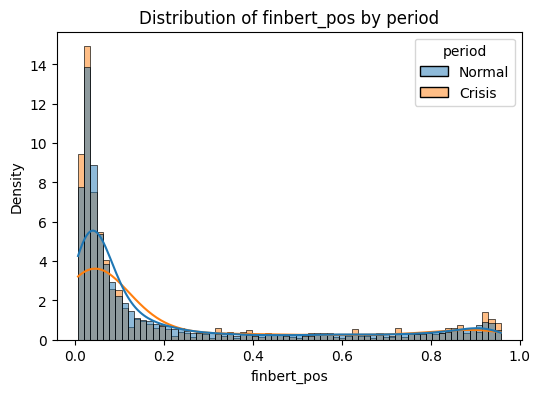

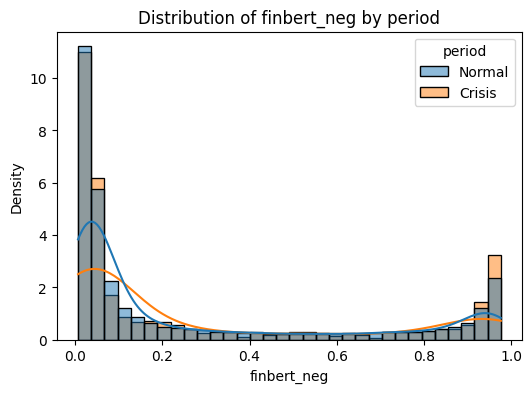

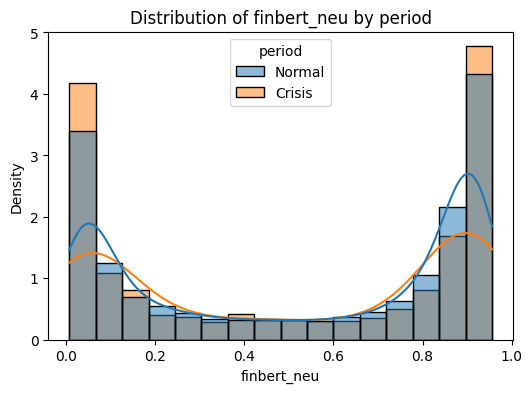

In [6]:
# Sentiment histograms by period
sentiment_cols = ["finbert_pos", "finbert_neg", "finbert_neu"]

for col in sentiment_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="period", kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by period")
    plt.show()

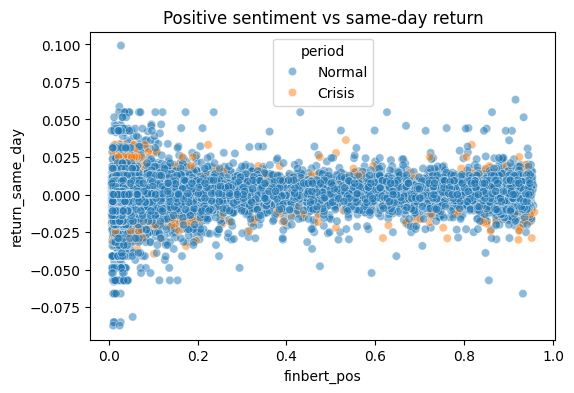

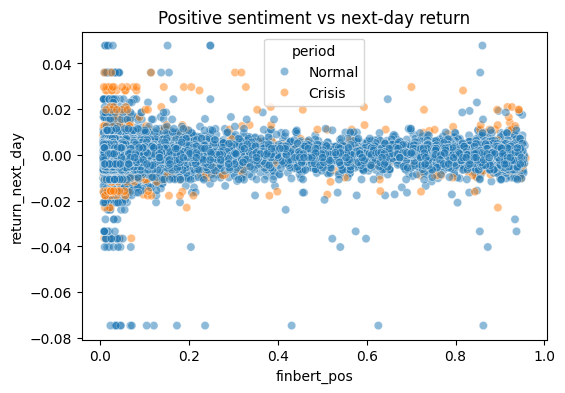

In [7]:
# Sentiment vs same-day return
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="finbert_pos", y="return_same_day", hue="period", alpha=0.5)
plt.title("Positive sentiment vs same-day return")
plt.show()

# Sentiment vs next-day return
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="finbert_pos", y="return_next_day", hue="period", alpha=0.5)
plt.title("Positive sentiment vs next-day return")
plt.show()

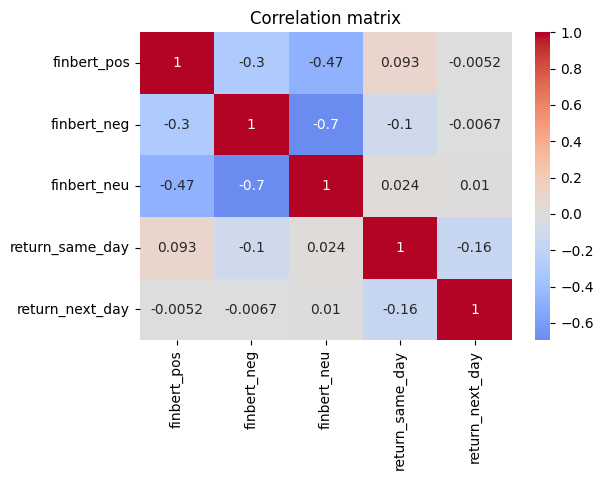

In [8]:
corr_cols = ["finbert_pos", "finbert_neg", "finbert_neu", "return_same_day", "return_next_day"]
corr = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

In [9]:
df.to_csv("../data/processed/headlines_finbert_with_returns_and_period.csv", index=False)
summary.to_csv("../results/tables/summary_by_period.csv", index=False)